In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import font_manager, rc
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [2]:
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 한글 폰트 파일 경로를 지정합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv("corporation_final_data.csv")

In [4]:
df.head(50)

,누적투자유치금액,기업추천수,투자단계명,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,산업구분명_분류,IT기업 여부,2017년 이후 설립 여부,수도권 여부,투자성공여부,누적투자유치금액_투자금액_차이,투자단계명_숫자
0,2.000000e+07,0,투자 단계 비공개,2.000000e+07,0,1,1,IT,1,0,1,0,0.000000e+00,1
1,5.028000e+10,71,Series B,1.250000e+10,1,1,94,IT,1,0,1,1,3.778000e+10,5
2,2.000000e+08,0,투자 단계 비공개,2.396568e+09,0,0,22,IT,1,0,1,1,-2.196568e+09,1
3,2.300000e+08,1,Angel,2.300000e+08,0,0,1,None IT,0,1,1,1,0.000000e+00,2
4,1.200000e+09,2,Series A,1.200000e+09,0,0,2,IT,1,0,1,1,0.000000e+00,4
5,1.000000e+09,2,투자 단계 비공개,1.000000e+09,0,1,1,IT,1,0,1,0,0.000000e+00,1
6,6.000000e+07,1,투자 단계 비공개,6.000000e+07,0,0,1,IT,1,1,1,0,0.000000e+00,1
7,7.500000e+09,11,투자 단계 비공개,2.396568e+09,1,1,7,None IT,0,1,1,1,5.103432e+09,1
8,1.000000e+09,6,투자 단계 비공개,2.396568e+09,0,0,11,IT,1,1,1,1,-1.396568e+09,1
9,2.325000e+09,28,Series A,2.000000e+09,0,0,32,IT,1,1,1,1,3.250000e+08,4


In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
df.head()

,누적투자유치금액,기업추천수,투자단계명,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,산업구분명_분류,IT기업 여부,2017년 이후 설립 여부,수도권 여부,투자성공여부,누적투자유치금액_투자금액_차이,투자단계명_숫자
0,20000000.00,0,투자 단계 비공개,20000000.00,0,1,1,IT,1,0,1,0,0.00,1
1,50280000000.00,71,Series B,12500000000.00,1,1,94,IT,1,0,1,1,37780000000.00,5
2,200000000.00,0,투자 단계 비공개,2396568300.88,0,0,22,IT,1,0,1,1,-2196568300.88,1
3,230000000.00,1,Angel,230000000.00,0,0,1,None IT,0,1,1,1,0.00,2
4,1200000000.00,2,Series A,1200000000.00,0,0,2,IT,1,0,1,1,0.00,4


In [10]:
df.drop(columns=['산업구분명_분류'], inplace=True)
df.drop(columns=['투자단계명'], inplace=True)

In [11]:
df.head()

,누적투자유치금액,기업추천수,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,IT기업 여부,2017년 이후 설립 여부,수도권 여부,투자성공여부,누적투자유치금액_투자금액_차이,투자단계명_숫자
0,20000000.00,0,20000000.00,0,1,1,1,0,1,0,0.00,1
1,50280000000.00,71,12500000000.00,1,1,94,1,0,1,1,37780000000.00,5
2,200000000.00,0,2396568300.88,0,0,22,1,0,1,1,-2196568300.88,1
3,230000000.00,1,230000000.00,0,0,1,0,1,1,1,0.00,2
4,1200000000.00,2,1200000000.00,0,0,2,1,0,1,1,0.00,4


In [20]:
df.to_csv("corporation_investment.csv", index=False)

### target = 누적투자유치금액
### features = 투자금액, 기업가치금액, 앱스토어, 구글플레이 등록 유무, 기업추천수, 투자일자(2017년 이전 이후?), 업종, 투자단계, 회사위치,

In [15]:
selected_features = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '수도권 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자']
target = df['투자성공여부']

features = df[selected_features]

In [16]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 머신러닝 모델 학습 (RandomForestRegressor 사용)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

# 모델 평가 (평균 제곱 오차 계산)
mse = mean_squared_error(y_test, predictions)
print(f'평균 제곱 오차: {mse}')

평균 제곱 오차: 0.12522633587786258


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 모델 학습
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions_linear = model_linear.predict(X_test)

# 모델 평가 (평균 제곱 오차 계산)
mse_linear = mean_squared_error(y_test, predictions_linear)
print(f'평균 제곱 오차 (Linear Regression): {mse_linear}')

평균 제곱 오차 (Linear Regression): 0.147401688488401


In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 특징 데이터 표준화 (표준화는 선형 회귀 모델에서 유용함)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 학습 (Ridge 회귀)
model_ridge = Ridge(alpha=0.5)  # alpha는 정규화 강도를 조절하는 하이퍼파라미터입니다.
model_ridge.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측
predictions_ridge = model_ridge.predict(X_test_scaled)

# 모델 평가 (평균 제곱 오차 계산)
mse_ridge = mean_squared_error(y_test, predictions_ridge)
print(f'평균 제곱 오차 (Ridge Regression): {mse_ridge}')

평균 제곱 오차 (Ridge Regression): 0.14739169784894626


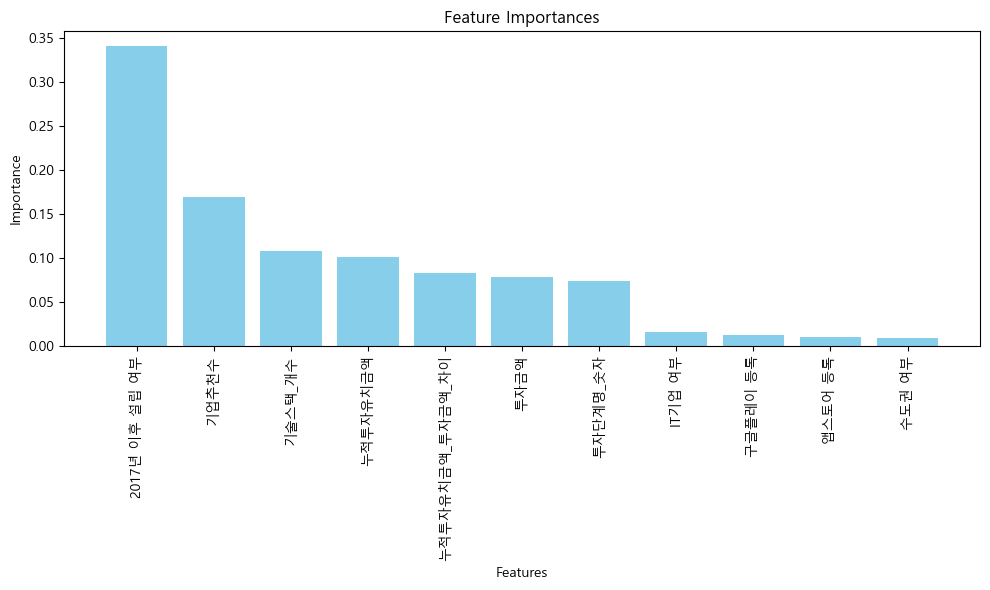

In [19]:
selected_features = ['누적투자유치금액', '기업추천수', '투자금액', '앱스토어 등록', '구글플레이 등록', '기술스택_개수', 'IT기업 여부', '2017년 이후 설립 여부', '수도권 여부', '누적투자유치금액_투자금액_차이', '투자단계명_숫자']
target = df['투자성공여부']

features = df[selected_features]

# 모델 생성 (Random Forest)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(features, target)

# 특징 중요도
importances = model_rf.feature_importances_

# 중요도 순으로 특징들을 정렬
indices = np.argsort(importances)[::-1]

# 특징 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(features.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(features.shape[1]), [selected_features[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [15]:
# 선형 회귀 모델 생성 및 학습
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# 테스트 데이터에 대한 예측
linear_reg_predictions = linear_reg_model.predict(X_test)

In [17]:
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)